# EDA(exploratory data analysis)

## 1.Importing libreries

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [191]:
%matplotlib inline

## 2.Reading the data set

In [192]:
loan_df=pd.read_csv(r"C:\Users\GCE PMNA\Downloads\Loan payments data (4).csv")
loan_df

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


## 3.Checking Shape

In [193]:
loan_df.shape

(500, 11)

## 4.info , describe

In [194]:
loan_df.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

In [195]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [196]:
loan_df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


## 5.Data Pre Processing

***a)Missing Value handling***

In [197]:
loan_df.isna().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

*-two columns are unfilled*

In [198]:
loan_df.dtypes

Loan_ID            object
loan_status        object
Principal           int64
terms               int64
effective_date     object
due_date           object
paid_off_time      object
past_due_days     float64
age                 int64
education          object
Gender             object
dtype: object

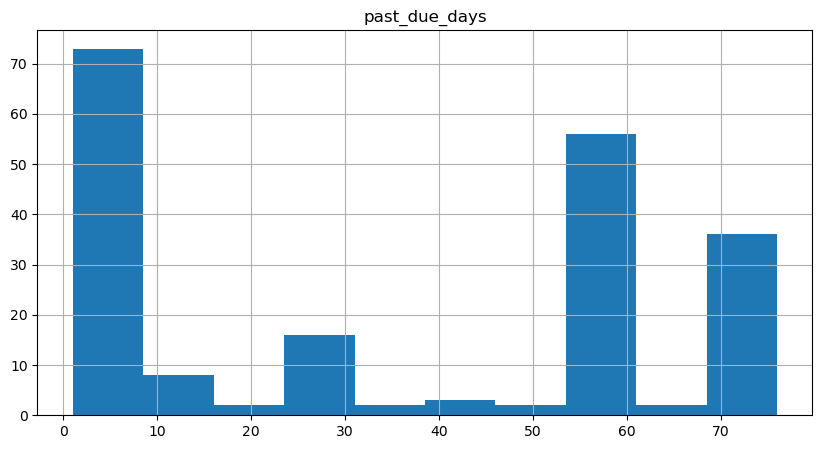

In [199]:
fgraph=loan_df.select_dtypes(include=['float'])
fgraph.hist(figsize=(10,5))
plt.show()

In [200]:
loan_df['past_due_days'] = loan_df['past_due_days'].fillna(loan_df['past_due_days'].median())


In [201]:
loan_df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days       0
age                 0
education           0
Gender              0
dtype: int64

*-column of float64 filled by using fillna(meadian) and other column not filled*

In [202]:
loan_df['paid_off_time'] = loan_df['paid_off_time'].fillna(loan_df['paid_off_time'].mode()[0])

In [203]:
loan_df.isnull().sum()

Loan_ID           0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64

*-column paid_off_time(object) is filled by using fillna(mode)*

#### grouping

In [204]:
loan_df.groupby('education')[['Principal','terms','past_due_days','age']].mean()

,Principal,terms,past_due_days,age
education,,,,
Bechalor,944.776119,21.462687,35.716418,32.134328
High School or Below,951.196172,23.631579,38.000000,31.377990
Master or Above,600.000000,11.000000,46.250000,40.250000
college,941.363636,22.686364,35.372727,30.390909


In [205]:
loan_df.groupby('Gender')[['Principal','terms','past_due_days','age']].mean()

,Principal,terms,past_due_days,age
Gender,,,,
female,945.454545,22.662338,35.038961,31.883117
male,942.789598,22.853428,36.888889,30.976359


##### hist plt

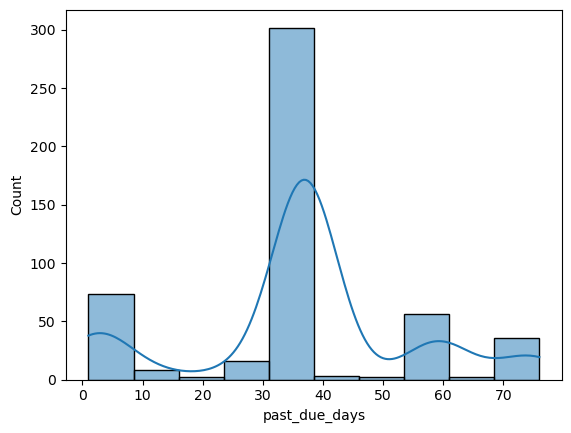

In [207]:
sns.histplot(x='past_due_days',data=loan_df,kde=True)
plt.show()

 :- high past_due_days are between 30 and 40

##### dist plot

C:\Users\GCE PMNA\AppData\Local\Temp\ipykernel_14916\684580350.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_df['age'],kde=True,bins=10)


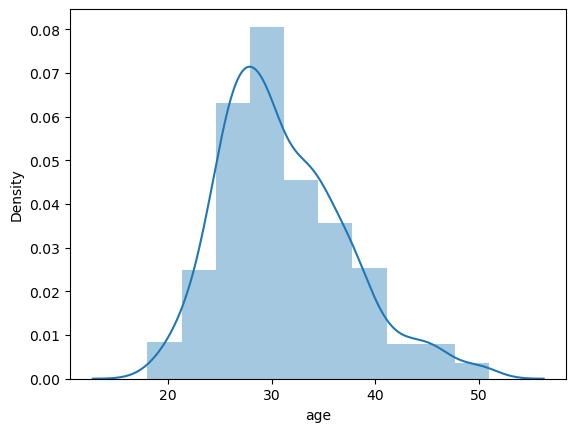

In [158]:
sns.distplot(loan_df['age'],kde=True,bins=10)
plt.show()

:- more borrowers age 30

##### count plot

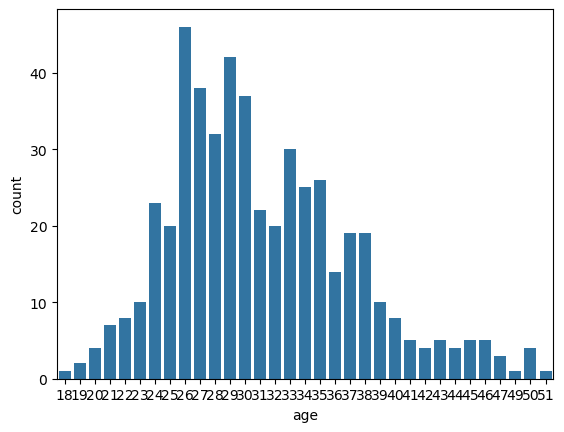

In [159]:
sns.countplot(x='age',data=loan_df)
plt.show()

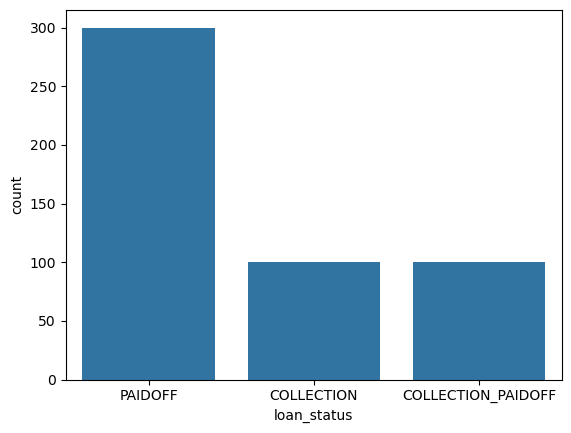

In [160]:
sns.countplot(x='loan_status',data=loan_df)
plt.show()

:- more borrowers are paid off ,
:- less borrowers are still on going and defaulted

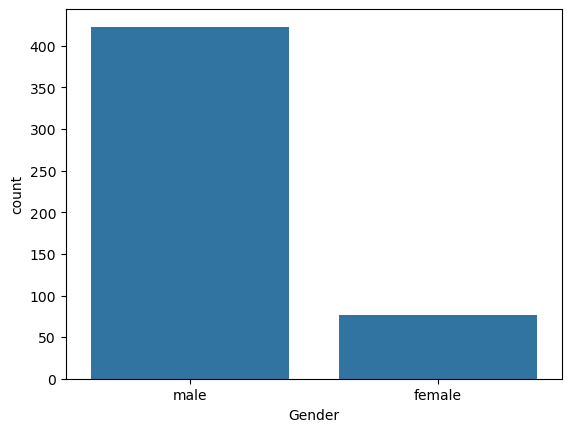

In [161]:
sns.countplot(x='Gender',data=loan_df)
plt.show()

:= more borrewers are males

##### barplot

C:\Users\GCE PMNA\AppData\Local\Temp\ipykernel_14916\2586566454.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender',y='past_due_days',data=loan_df,palette='Reds')


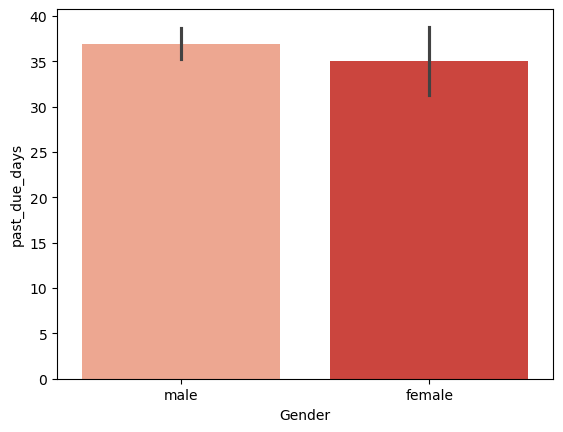

In [162]:
sns.barplot(x='Gender',y='past_due_days',data=loan_df,palette='Reds')
plt.show()

:- males are more Psat_due_days than females (juts below)

##### countplot

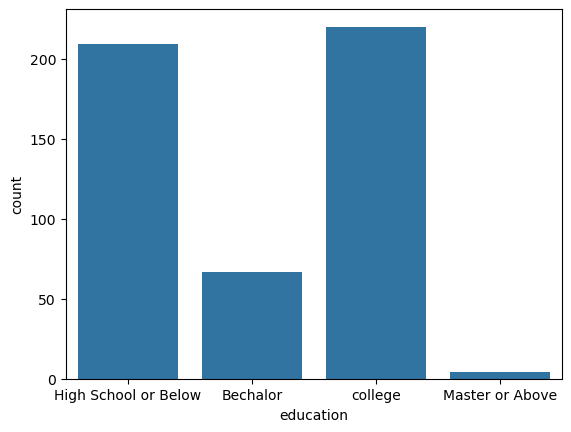

In [163]:
sns.countplot(x='education',data=loan_df)
plt.show()

more borrowers education are high School or below and collage than master or above and bechalor

##### box plot

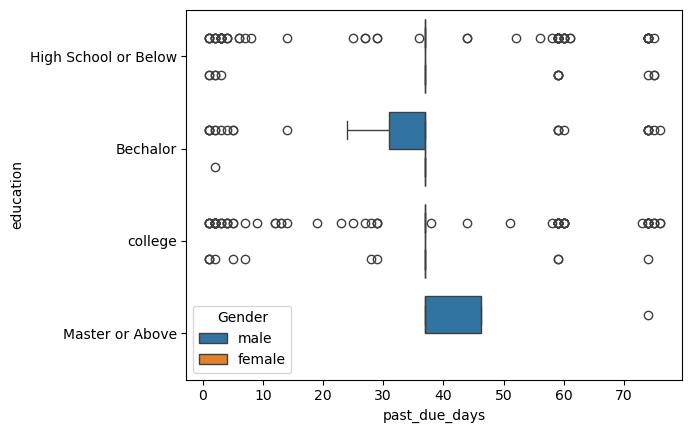

In [164]:
sns.boxplot(x='past_due_days',y='education',data=loan_df,hue='Gender')
plt.show()

:- minimum past due days bechalor educated borrowers
:-maximum past due days master or above educated borrowers
:- others are approximately equal

##### pairplot

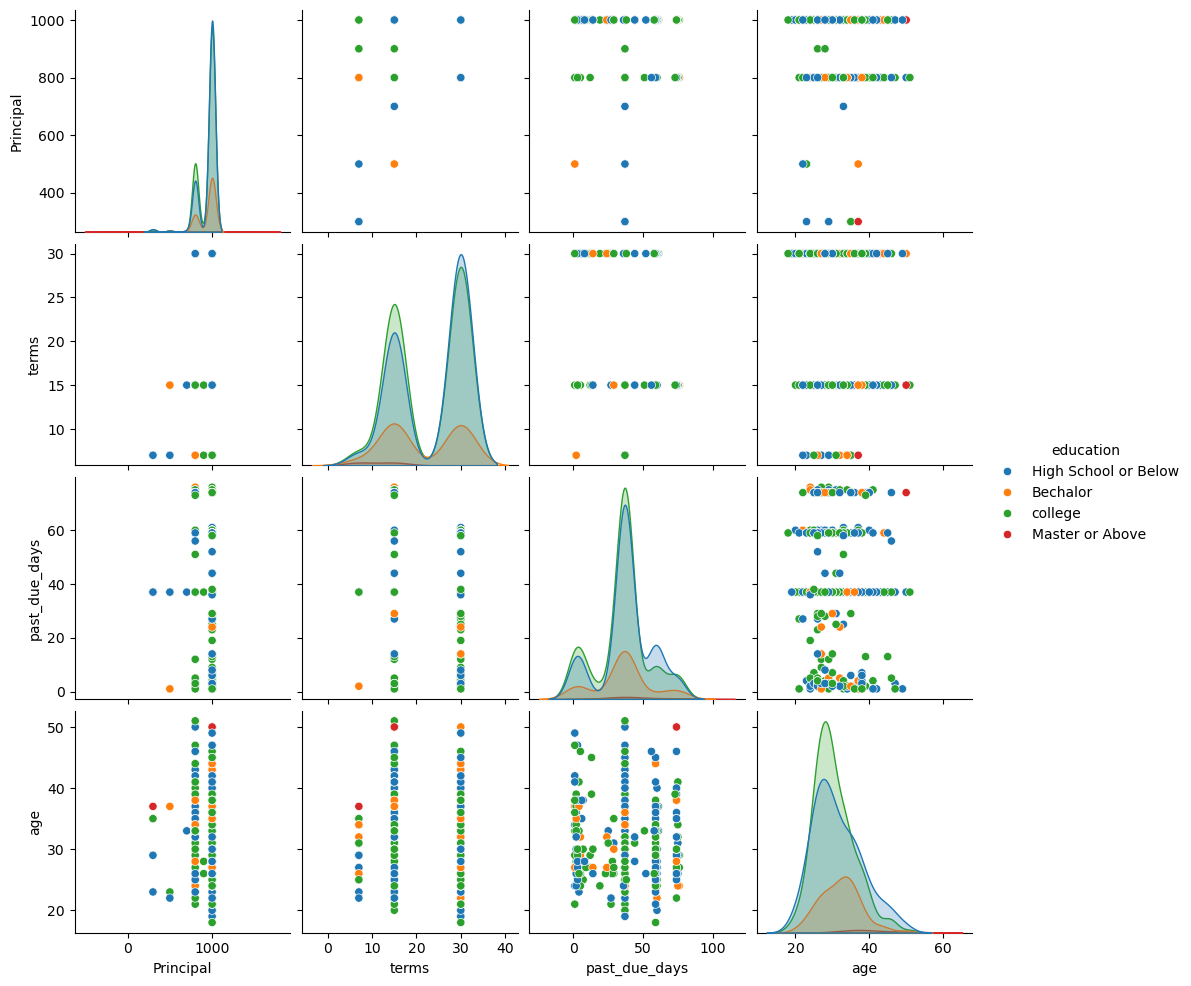

In [165]:
sns.pairplot(loan_df[['Principal','terms','past_due_days','age','education']],hue='education')
plt.show()

high school or below educated borrowers and collage borrowers are more about all things(principal,terms,past due days, age )
others are approximately less

##### heatmap

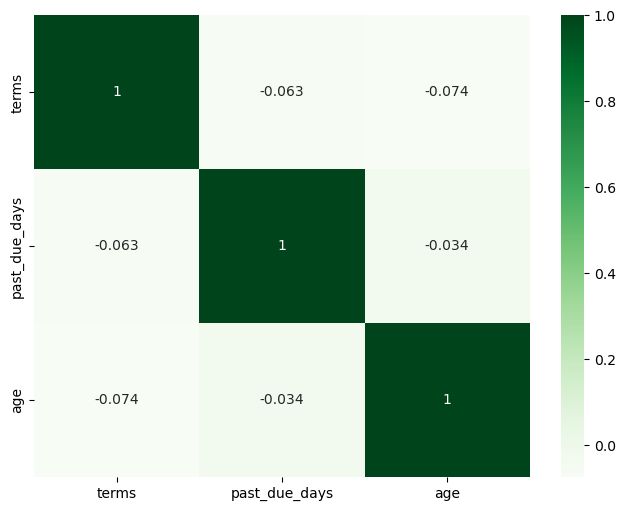

In [166]:
plt.figure(figsize=(8,6))
loan_data=loan_df[['terms','past_due_days','age']].corr()
sns.heatmap(loan_data,annot=True,cmap='Greens')
plt.show()

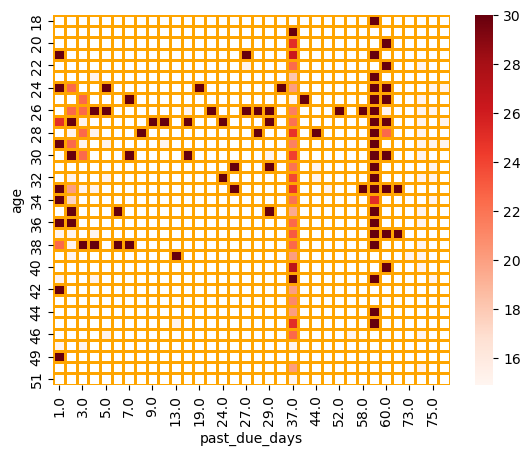

In [167]:
loan_h=loan_df.pivot_table(index='age',columns='past_due_days',values='terms')
sns.heatmap(loan_h,cmap='Reds',linecolor='orange',linewidths=1)
plt.show()

##### average loan_status

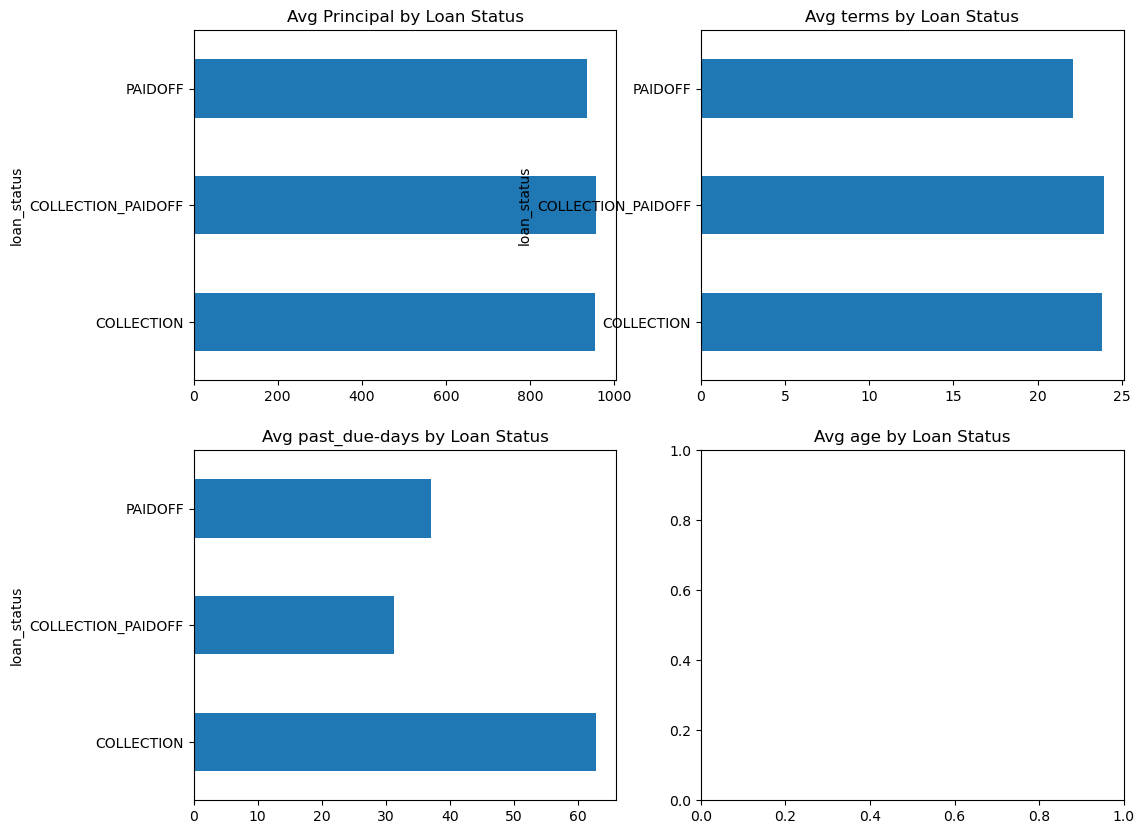

In [ ]:

plt.show()igbi,axesbi=plt.subplots(2,2,figsize=(12,10))
loan_df.groupby('loan_status')['Principal'].mean().plot(kind='barh',ax=axesbi[0, 0])
axesbi[0, 0].set_title('Avg Principal by Loan Status')
loan_df.groupby('loan_status')['terms'].mean().plot(kind='barh',ax=axesbi[0, 1])
axesbi[0, 1].set_title('Avg terms by Loan Status')
loan_df.groupby('loan_status')['past_due_days'].mean().plot(kind='barh',ax=axesbi[1, 0])
axesbi[1, 0].set_title('Avg past_due-days by Loan Status')
loan_df.groupby('loan_status')['age'].mean().plot(kind='barh',ax=axesbi[1, 0])
axesbi[1, 1].set_title('Avg age by Loan Status')


***b)outlier detection***

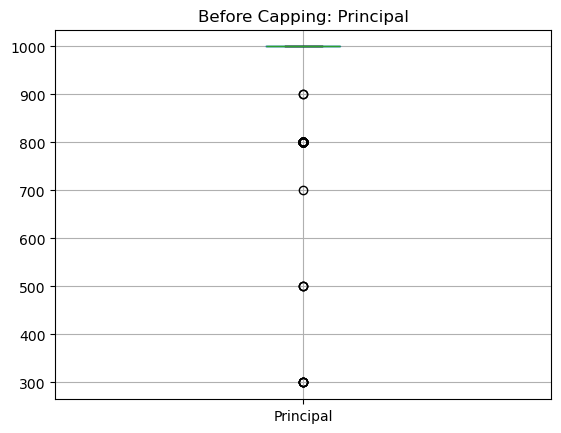

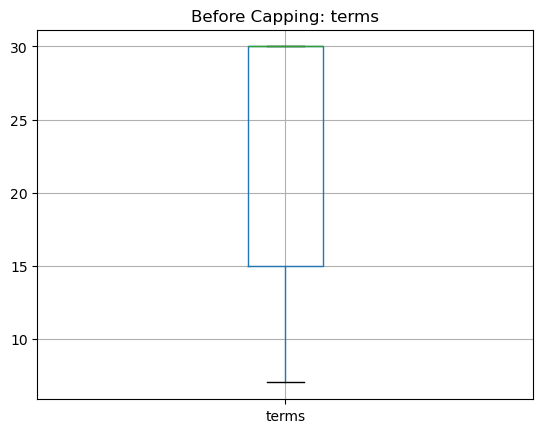

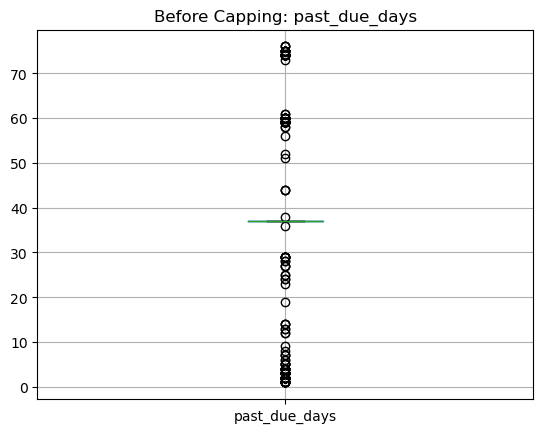

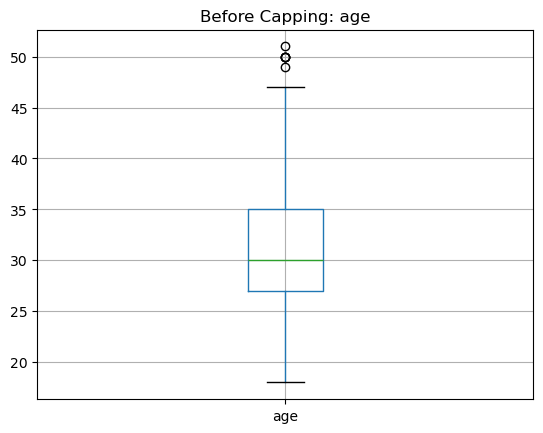

In [169]:
num_cols = ['Principal','terms','past_due_days','age']

for col in num_cols:
    plt.figure()
    loan_df.boxplot(column=[col])
    plt.title(f"Before Capping: {col}")
    plt.show()

In [170]:
colss = ['Principal','past_due_days','age']

for col in colss:
    Q1 = loan_df[col].quantile(0.25)
    Q3 = loan_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR
    loan_df[colss]=loan_df[colss].clip(lower_cap,upper_cap)

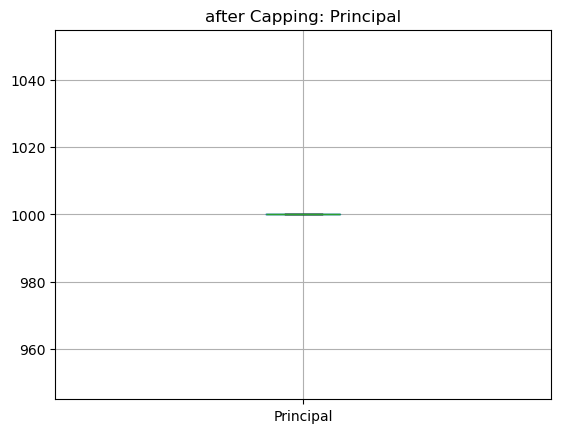

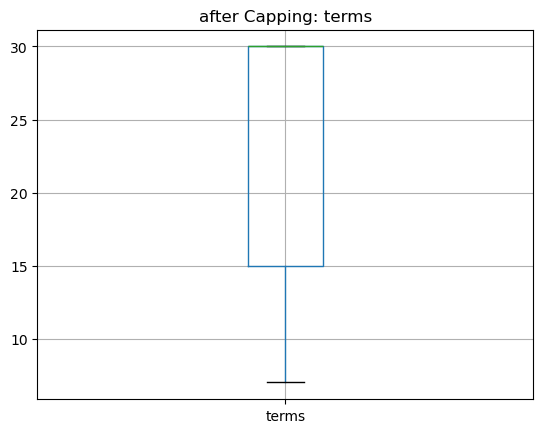

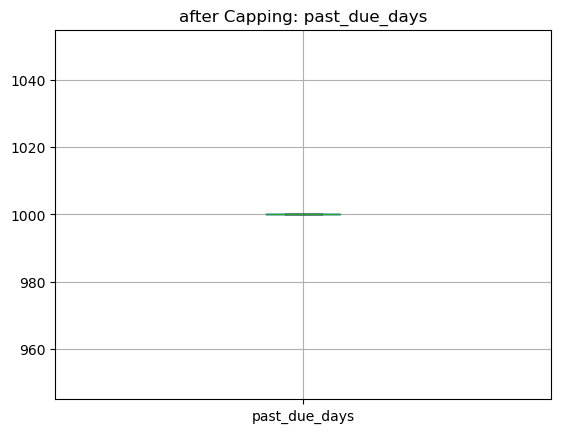

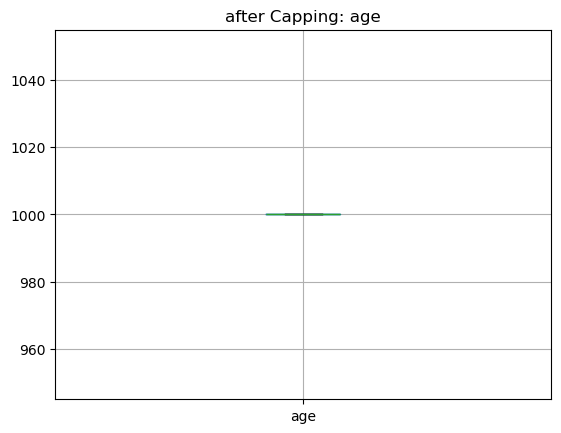

In [171]:
num_cols = ['Principal','terms','past_due_days','age']

for col in num_cols:
    plt.figure()
    loan_df.boxplot(column=[col])
    plt.title(f"after Capping: {col}")
    plt.show()

***d)Univariate,Bivariate and Multivariate  Analysis***

## Univariate Analysis

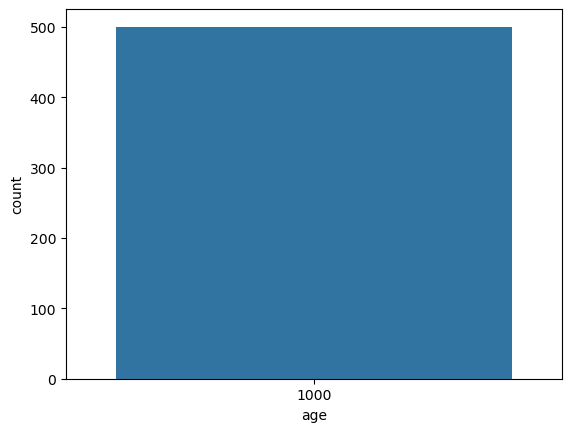

In [172]:
sns.countplot(x='age',data=loan_df)
plt.show()

C:\Users\GCE PMNA\AppData\Local\Temp\ipykernel_14916\684580350.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_df['age'],kde=True,bins=10)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


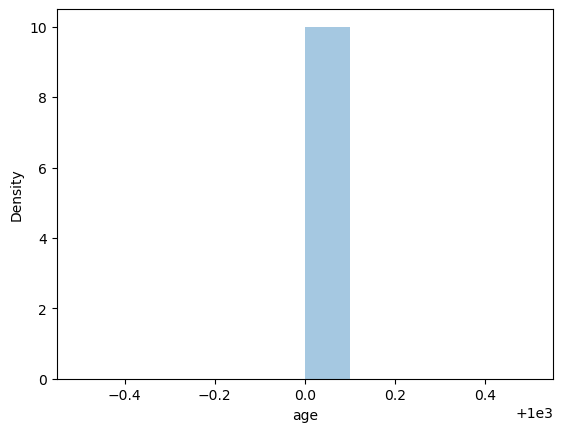

In [173]:
sns.distplot(loan_df['age'],kde=True,bins=10)
plt.show()

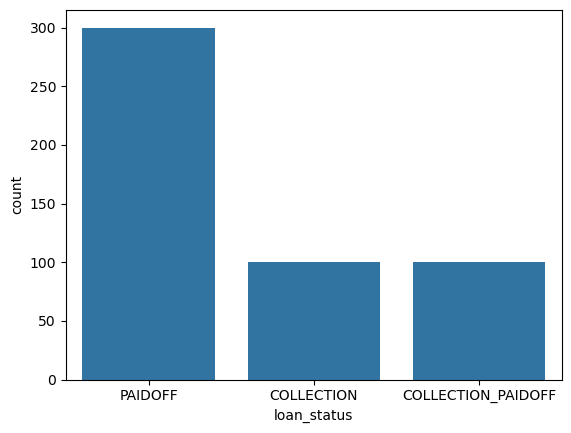

In [174]:
sns.countplot(x='loan_status',data=loan_df)
plt.show()

In [175]:
# Most borrowers successfully repay their loans (PAIDOFF).

# Around two-thirds fewer loans end up in collection or collection paid off categories.

# This suggests the majority of borrowers are reliable, but a small portion have repayment issues.

C:\Users\GCE PMNA\AppData\Local\Temp\ipykernel_14916\2321116384.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(loan_df['past_due_days'])


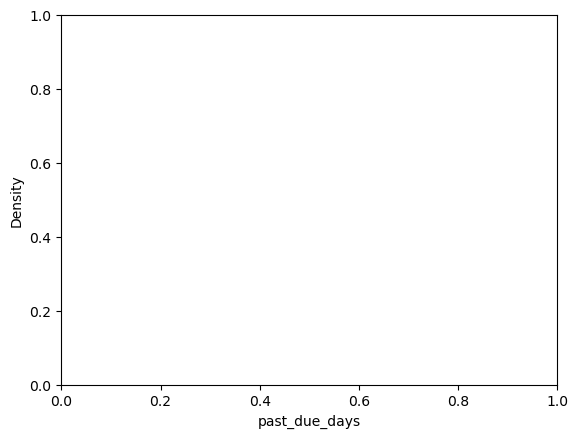

In [176]:
sns.kdeplot(loan_df['past_due_days'])
plt.show()

In [177]:
# few amount peoples are lagging to repay

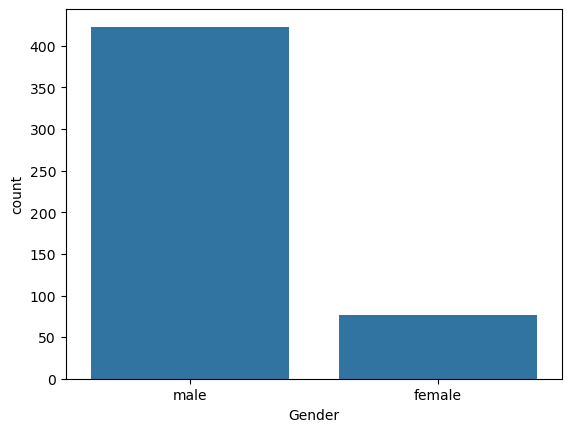

In [178]:
sns.countplot(x='Gender',data=loan_df)
plt.show()

In [179]:
# males more than females

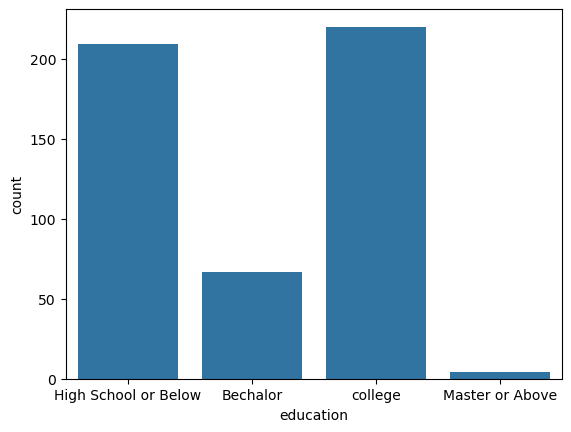

In [180]:
sns.countplot(x='education',data=loan_df)
plt.show()

In [181]:
# more loaners are high school or below and collage educated peoples
# less loaners are Bechalor and mater or above educated peoples

## Bivariate Analysis

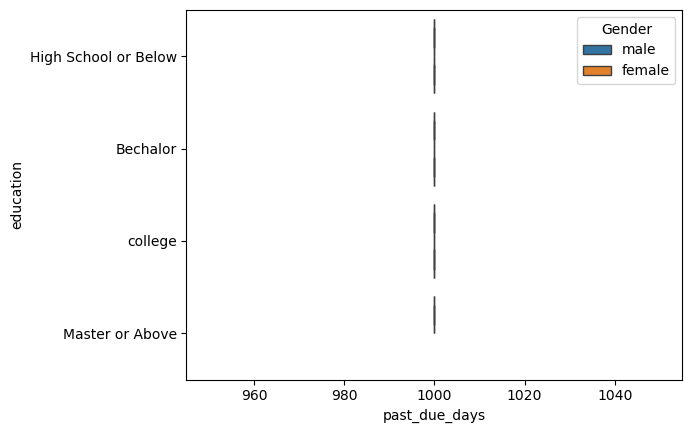

In [182]:
sns.boxplot(x='past_due_days',y='education',data=loan_df,hue='Gender')
plt.show()

high school or below and bachalor males has more past due days (more lagging repay) and females lagging but not more
collage and maser or above has less past to days (less lagging repay)and female are very less 



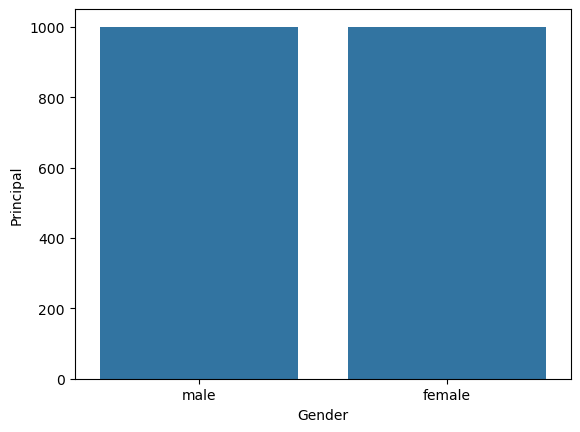

In [183]:
sns.barplot(x='Gender',y='Principal',data=loan_df)
plt.show()

males and females principal amount is equal

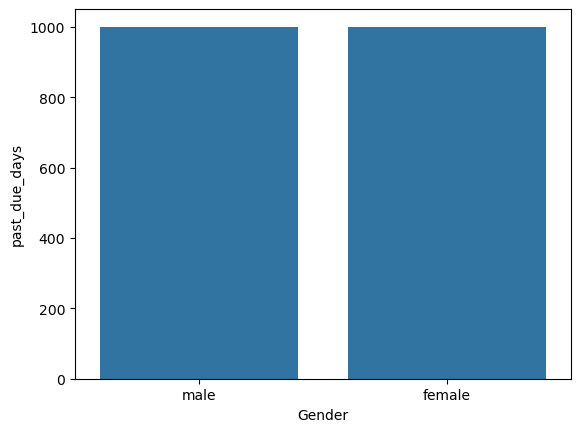

In [184]:
sns.barplot(x='Gender',y='past_due_days',data=loan_df)
plt.show()

males past due days are more than females

## multivariate

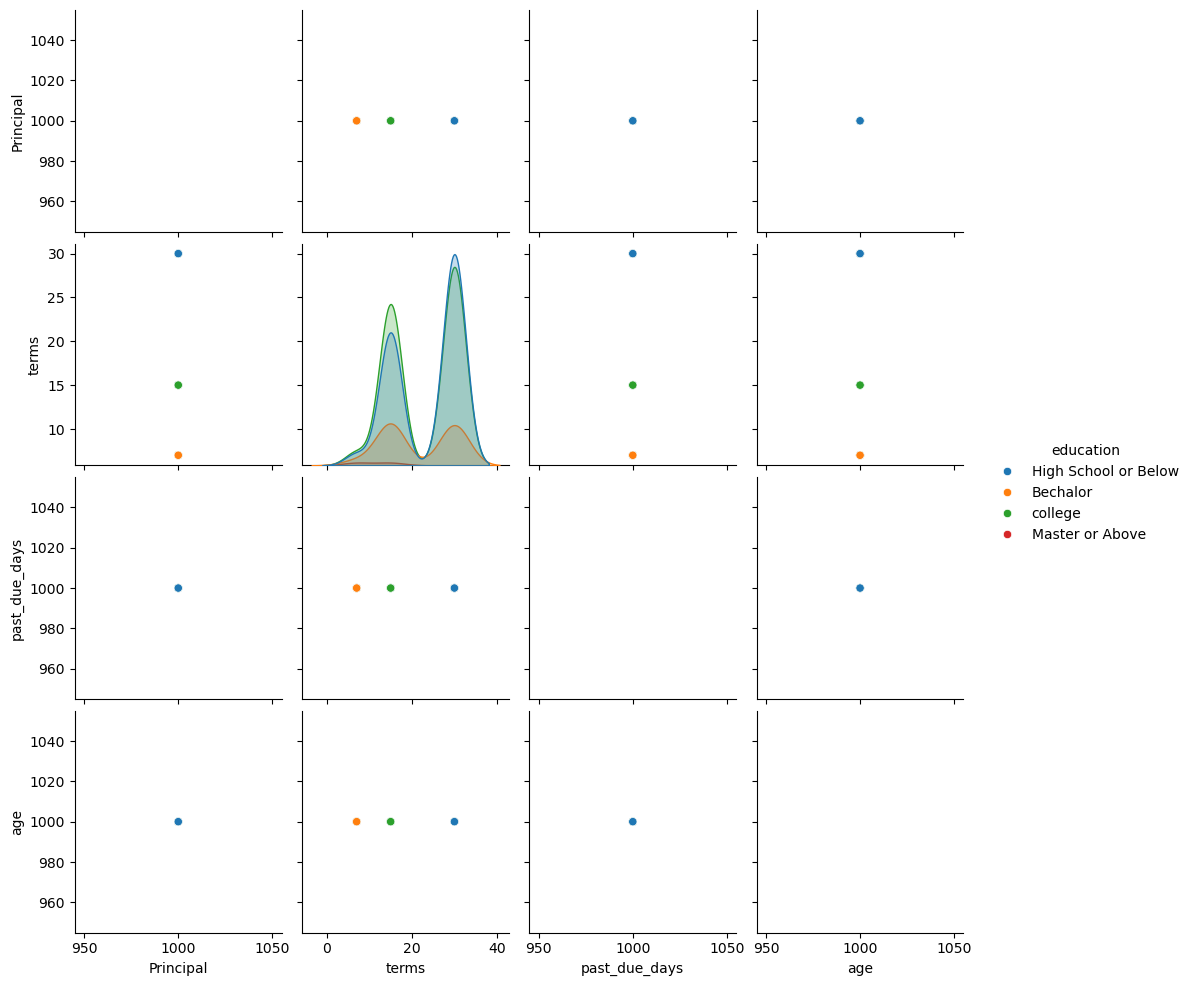

In [185]:
sns.pairplot(loan_df[['Principal','terms','past_due_days','age','education']],hue='education')
plt.show()

generally high school or below and collage  educate  peoples as more count of everythings,
others are  generally low 

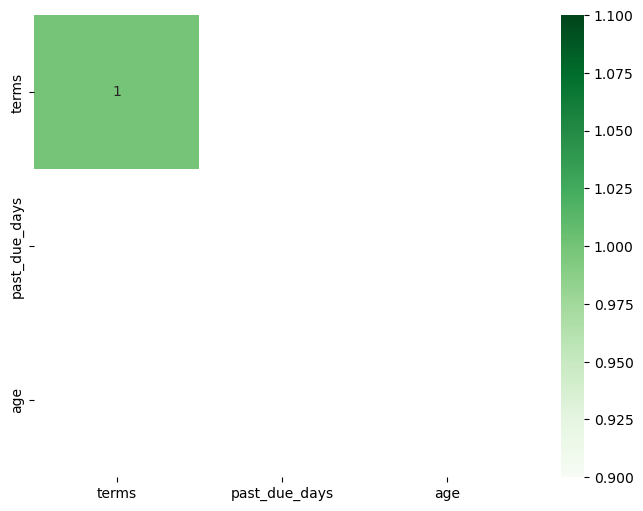

In [186]:
plt.figure(figsize=(8,6))
loan_data=loan_df[['terms','past_due_days','age']].corr()
sns.heatmap(loan_data,annot=True,cmap='Greens')
plt.show()

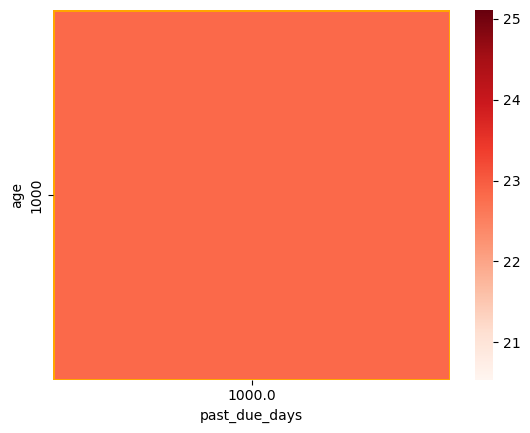

In [187]:
loan_h=loan_df.pivot_table(index='age',columns='past_due_days',values='terms')
sns.heatmap(loan_h,cmap='Reds',linecolor='orange',linewidths=1)
plt.show()